Мы собираемся создать датасет с:

- 1000 примеров
- 1 функция (информативная функция)
- 1 кластер на класс
- мягкое разделение классов

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000
                           ,n_features = 1
                           ,n_informative = 1
                           ,n_redundant = 0
                           ,n_clusters_per_class = 1
                           ,class_sep = 2
                           ,random_state = 2
                           )

In [18]:
pd.DataFrame(X).head()

,0
0,-1.542240
1,2.273902
2,1.316830
3,-2.014660
4,-2.846408


<Axes: >

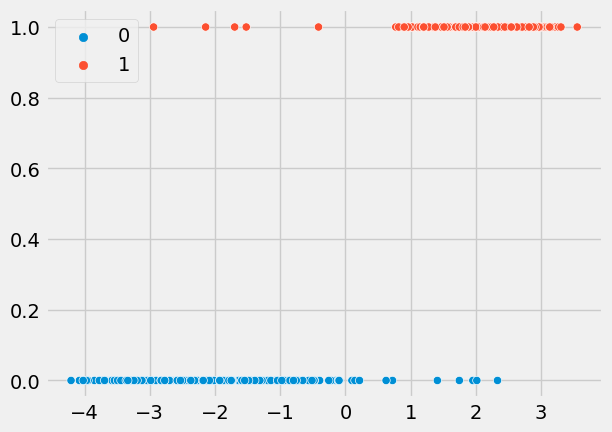

In [20]:
sns.scatterplot(x = X.flatten(), y = y, hue = y)

Здесь мы создадим датасет с:

- 200 примеров
- 2 функции (обе из них информативные, 0 избыточных)
- 1 кластер на класс
- мягкое разделение классов

In [60]:
X, y = make_classification(n_samples = 200,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_classes = 2,
                           class_sep = 2,
                           random_state = 1,
                           )

In [61]:
pd.DataFrame(X).head()

,0,1
0,-2.273999,-4.214410
1,-2.235762,-4.997952
2,2.854004,1.726989
3,1.720732,-1.026282
4,3.255234,1.253566


In [62]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,0
4,1


<Axes: >

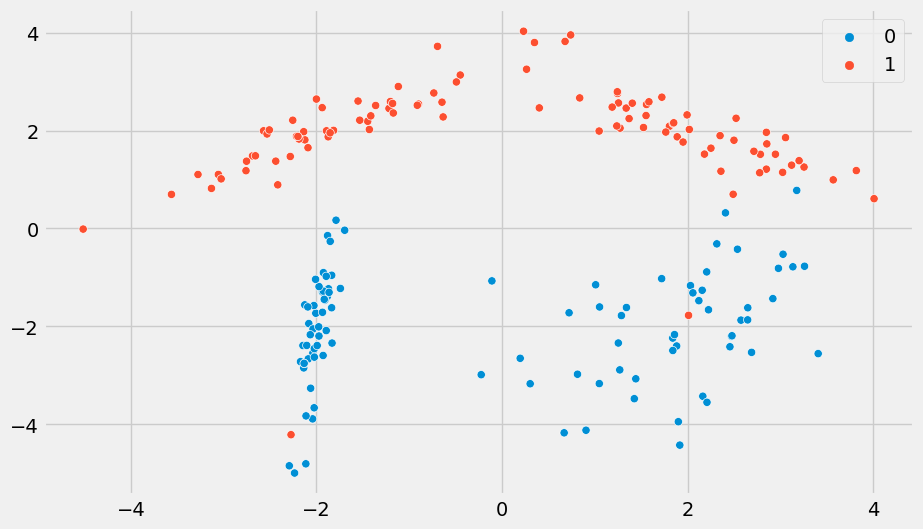

In [63]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)

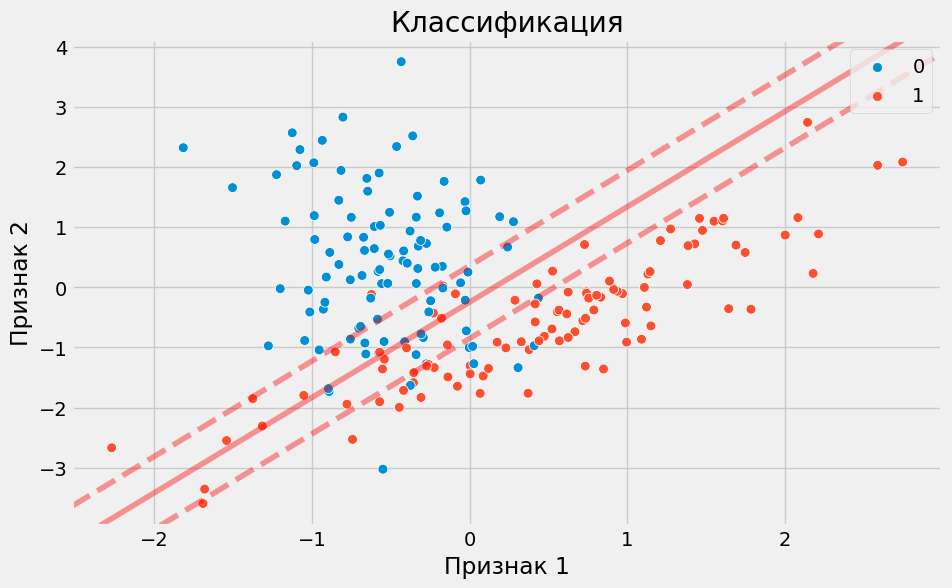

In [30]:
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_samples=200,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=0.5,
                           random_state=7)


model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=50)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.4,
           linestyles=['--', '-', '--'])

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Классификация')

plt.show()

